In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                     
warnings.filterwarnings("ignore")


In [28]:
pwd

'C:\\Users\\HP'

In [29]:
train=pd.read_csv(r"C:\Users\HP\Dropbox\My PC (DESKTOP-A6DAH59)\Desktop\train.csv")
test=pd.read_csv(r"C:\Users\HP\Dropbox\My PC (DESKTOP-A6DAH59)\Desktop\test.csv")

In [30]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [31]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [32]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [33]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

We see that the test data set doesnt have the <b>subscribed</b> column so it is a <b>target variable or dependent variable</b>

In [34]:
train.shape, test.shape

((31647, 18), (13564, 17))

since train dataset has 18 columns there are 18 independent and 1 dependent variable or target variable i.e. subscribed.We will predict the subscribed with the help of model built using the train data.

In [35]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

<b>object</b>: Object format means variables are categorical.Therefore Subscribed is a categorial variable.

In [36]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


## <b>UNIVARIATE ANALYSIS For Categorical variables:-Subscribed</b>

In [37]:
#couting the no. Y/N of subscribed(frequency Table for subscribed variable)
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [38]:
#to print thr proportion or % 
(train['subscribed'].value_counts()/len(train['subscribed']))*100

#or other way is : Normalize can be set to True to print proportions instead of number 
#train['subscribed'].value_counts(normalize=True)

no     88.261131
yes    11.738869
Name: subscribed, dtype: float64

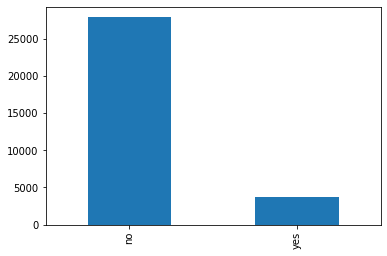

In [39]:
train['subscribed'].value_counts().plot.bar()

From the bar plot we can infer that 3715 people which is around 12% of 31,647 have subscribed and 27.932 which is 88% of 31,647 have not subscribed.
Now, we need to check our dependent variable depends on what factors or on which independent variables.

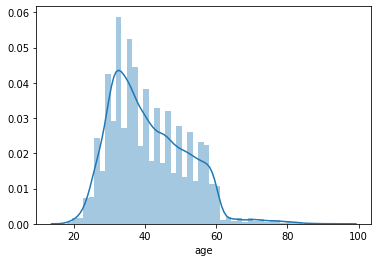

In [40]:
sns.distplot(train["age"])

we can see from the histogram that mostly people are of the age group 20-60

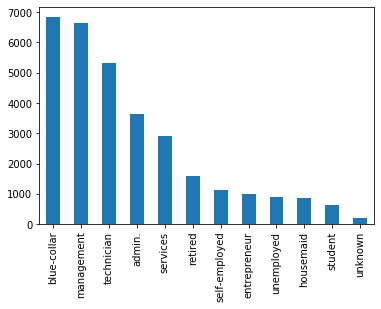

In [41]:
train['job'].value_counts().plot.bar()

We can infer from the above plot that most of the people belong to the blue-collar jobs.

no     98.151484
yes     1.848516
Name: default, dtype: float64

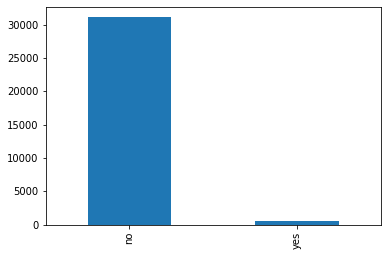

In [42]:
train['default'].value_counts().plot.bar()
train['default'].value_counts()
(train['default'].value_counts()/len(train['default']))*100

We can see that max people(31,062) whic is approx 99% have default value as NO which means No default history.

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

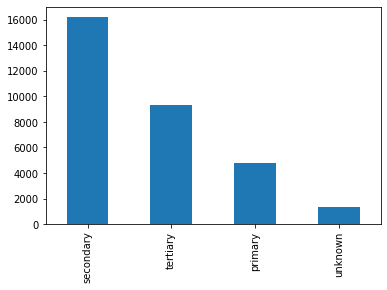

In [43]:
train['education'].value_counts().plot.bar()
train['education'].value_counts()

Most of the people have had education level till secondary. 

## Bivariate Analysis

In [44]:
#Correlation between all the continuous variables
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


Now we will check the relationship between job and subscribed variable. i.e. people belonging to which job have mostly subscribed.

job         admin.  blue-collar  entrepreneur  housemaid  management  retired  \
subscribed                                                                      
no            3179         6353           923        795        5716     1212   
yes            452          489            85         79         923      362   

job         self-employed  services  student  technician  unemployed  unknown  
subscribed                                                                     
no                    983      2649      453        4713         776      180  
yes                   140       254      182         594         129       26  


Text(0, 0.5, 'No. of people')

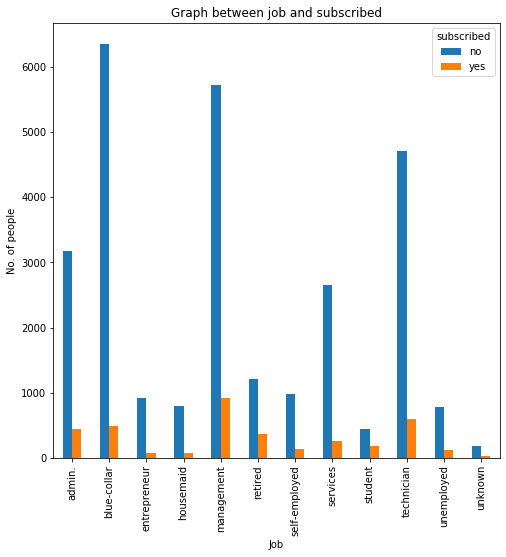

In [45]:
print(pd.crosstab(train['subscribed'],train['job']))

job=pd.crosstab(train['job'],train['subscribed'])
job.plot(kind="bar", stacked=False, figsize=(8,8),title='Graph between job and subscribed')
plt.xlabel('Job')
plt.ylabel('No. of people')

Clearly,We can see that no. of people that have subscribed the most belong to the management job

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'No of people with y/n')

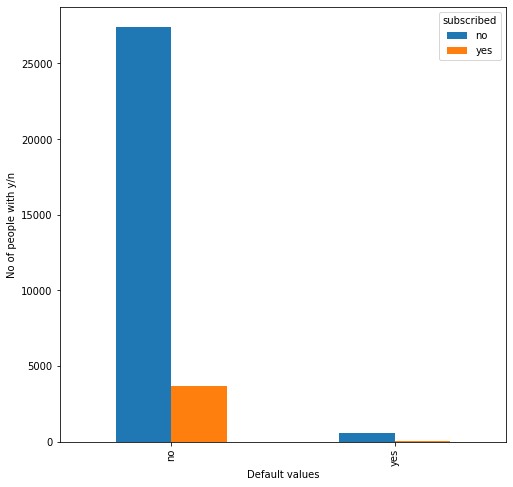

In [46]:
print(pd.crosstab(train['default'],train['subscribed']))
default=pd.crosstab(train['default'],train['subscribed'])
default.plot(kind="bar", stacked=False, figsize=(8,8))
plt.xlabel('Default values')
plt.ylabel('No of people with y/n')

we can clearly see from the above bar plot that no. of people that have subscribed have NO defaults,while no. of people that have subscribed with default values YES are very less=41.We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

## Identifying the missing values in the colums

In [47]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Since the sum comes out to be 0 for every column we can conclude that none of the column has a missing values.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [48]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

                  ID       age   balance       day  duration  campaign  \
ID          1.000000  0.013337  0.067897 -0.063399  0.007183 -0.103508   
age         0.013337  1.000000  0.103245 -0.011056 -0.003870  0.005733   
balance     0.067897  0.103245  1.000000  0.003461  0.024274 -0.012032   
day        -0.063399 -0.011056  0.003461  1.000000 -0.032288  0.159168   
duration    0.007183 -0.003870  0.024274 -0.032288  1.000000 -0.080305   
campaign   -0.103508  0.005733 -0.012032  0.159168 -0.080305  1.000000   
pdays       0.436148 -0.021947  0.001789 -0.087626  0.000529 -0.087570   
previous    0.254476  0.005761  0.013843 -0.048752  0.001783 -0.033151   
subscribed  0.296663  0.024538  0.050807 -0.029600  0.389838 -0.070607   

               pdays  previous  subscribed  
ID          0.436148  0.254476    0.296663  
age        -0.021947  0.005761    0.024538  
balance     0.001789  0.013843    0.050807  
day        -0.087626 -0.048752   -0.029600  
duration    0.000529  0.001783    

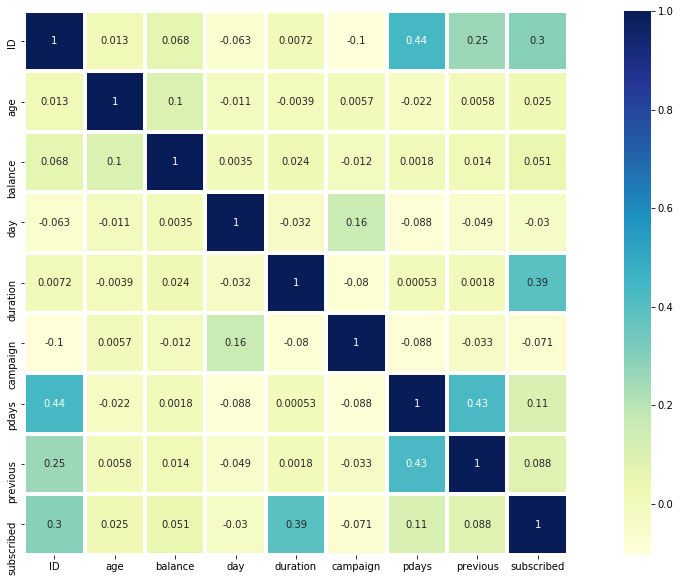

In [49]:
corr=train.corr()
print(corr)
#matrix = np.triu(corr) or matrix=np.tril(corr)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, annot = True,fmt='.2g', linewidths=3, linecolor='white',cmap="YlGnBu",square=True )#mask=matrix)

We can see that duration of call is highly correlated to the subscribed variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

## Building a Model

### Logistic regression for classification problem

For this we need to separate independent and dependent variables.

In [50]:
target=train['subscribed']
train=train.drop('subscribed', axis=1)

Since we can see that some of the columns take input in the form of strings therefore we need to make dummies for them so that we can apply linear regression model because it works only on int or float.

In [51]:
train = pd.get_dummies(train)

In [52]:
train.shape

(31647, 52)

In [53]:
from sklearn.model_selection import train_test_split

In [67]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=12)

In [68]:
print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(25317, 52) (25317,)
(6330, 52) (6330,)


## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [57]:
#making an object
logreg=LogisticRegression()

In [58]:
# fitting the model on  X_train and y_train
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
#making predictions on validation set
prediction = logreg.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

We will now check the accuracy using the score function

In [76]:
#calculation of accuracy on train dataset
logreg.score(X_train,y_train)

0.8921278192518861

In [78]:
from sklearn.metrics import accuracy_score
#calculating the accuracy score of validation dataset
accuracy_score(y_test,prediction) 
#or on test dataset logreg.score(X_test,y_test)

0.8928909952606635

We can see from the above conclusions that accuracy for both train and validation is almost same and is around 90%

## Decision trees

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
clf= DecisionTreeClassifier(max_depth=5, random_state=0)#maxdeapth can be changed acc to the accuracy score 

In [94]:
clf.fit(X_train,y_train) #fit function accepts 2 arg 1 independent(x_train) and 1 dependent variable(y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [95]:
#we will make predictions on train dataset
clf.score(X_train,y_train)

0.913970849626733

In [96]:
predict=clf.predict(X_test)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score
#calculating the accuracy score of validation dataset
accuracy_score(y_test,predict) 

0.9063191153238547

In [98]:
clf.score(X_test,y_test)

0.9063191153238547

We can conclude that our accuracy is almost equal for test and train dataset

### We will now make predictions on the test dataset

In [99]:
test=pd.get_dummies(test)

In [105]:
test.shape

(13564, 52)

In [106]:
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [102]:
test_prediction = clf.predict(test)
test_prediction

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [103]:
finalsub=pd.DataFrame()

In [107]:
# creating a Business_Sourced column and saving the predictions in it
finalsub['ID'] = test['ID']
finalsub['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively

In [109]:
finalsub['subscribed'].replace(0,'no',inplace=True)
finalsub['subscribed'].replace(1,'yes',inplace=True)

In [116]:
finalsub.head()

,ID,subscribed
0,38441,no
1,40403,yes
2,3709,no
3,37422,no
4,12527,no


In [120]:
finalsub.to_csv('submission.csv', header=True, index=False)